In [2]:
### 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
retail = pd.DataFrame([])
sheets = ['Year 2009-2010', 'Year 2010-2011']

for s in sheets:
    retail = pd.concat([retail, pd.read_excel('online_retail.xlsx', sheet_name = s)], ignore_index = True)
retail.head()

In [10]:
### How many customers are there in the dataset?

retail['Customer ID'].nunique()

5942

In [35]:
### Describe the dataset with the necessary information?

retail[['Description', 'Country']].describe()

,Description,Country
count,1062989,1067371
unique,5698,43
top,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,5918,981330


In [57]:
retail[retail ['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0,Quantity_RO
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-12.0,2.95,-12.0
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-6.0,1.65,-6.0
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-4.0,4.25,-4.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-6.0,2.10,-6.0
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-12.0,2.95,-12.0
...,...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-11.0,0.83,-11.0
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-1.0,8.50,-1.0
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-5.0,8.50,-5.0
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.0,1.25,-1.0


In [58]:
retail[retail['Quantity'] < 0].nunique() 

Invoice        11684
StockCode       4089
Description     3300
Quantity         493
InvoiceDate    10709
Price           1006
Customer ID     2572
Country           36
Quantity_R0       13
Price_R0         258
Quantity_RO       13
dtype: int64

In [59]:
retail[retail ['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0,Quantity_RO
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,1.0,-3.1,1.0
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,1.0,-3.1,1.0
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,1.0,-3.1,1.0
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,1.0,-3.1,1.0
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,1.0,-3.1,1.0


In [19]:
### How many unique values are there in each feature?
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [13]:
retail.isna().sum()/len(retail)

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64

In [14]:
###  How many unique values are there in each feature?
retail.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

<AxesSubplot:>

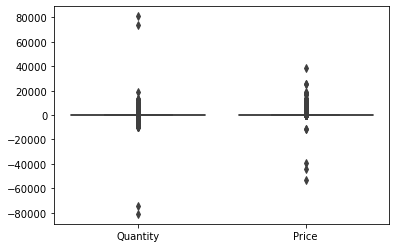

In [38]:
### Are there any outliers in each feature?
sns.boxplot(data = retail[['Quantity', 'Price']])

In [15]:
retail.duplicated().sum()

34335

In [16]:
### 3. Data cleaning and preprocessing 


In [20]:
# Remove the outlier if any
q1 = retail['Quantity'].quantile(0.25)
q3 = retail['Quantity'].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [21]:
retail['Quantity_RO'] = pd.DataFrame(np.where(retail['Quantity'] > upper_limit, upper_limit,
                                                (np.where(retail['Quantity'] < lower_limit, lower_limit,
                                                          retail['Quantity']))))
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0,Quantity_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25,23.5


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity_RO'>

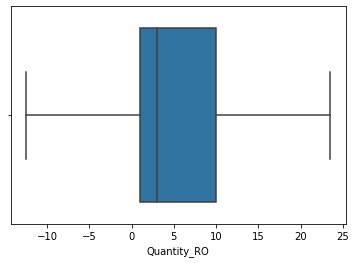

In [22]:
sns.boxplot(retail['Quantity_RO'])  

In [23]:
q1 = retail['Price'].quantile(0.25)
q3 = retail['Price'].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [16]:
retail['Price_R0'] = pd.DataFrame(np.where(retail['Price'] > upper_limit, upper_limit,
                                                (np.where(retail['Price'] < lower_limit, lower_limit,
                                                          retail['Price']))))
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_R0'>

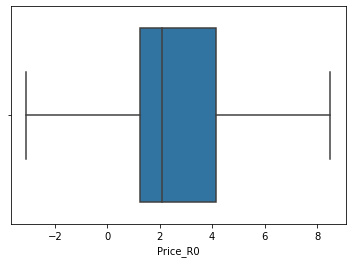

In [30]:
sns.boxplot(retail['Price_R0'])  

<AxesSubplot:>

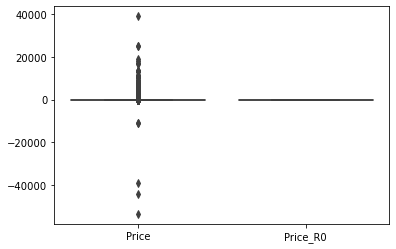

In [17]:
sns.boxplot(data = retail[['Price', 'Price_R0']])

In [18]:
# Remove the missing values if any.
retail2 = retail.dropna(subset = ['Customer ID'])
retail2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   Quantity_R0  824364 non-null  float64       
 9   Price_R0     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 69.2+ MB


In [24]:
# Convert the date to datetime format.
# Convert the quantity to numeric.
retail2['Quantity_R0'] = retail2['Quantity_R0'].astype('int64')

C:\Users\admin\AppData\Local\Temp/ipykernel_13808/1176573179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail2['Quantity_R0'] = retail2['Quantity_R0'].astype('int64')


In [26]:
retail2['Customer ID'] = retail2['Customer ID'].astype('int64')

C:\Users\admin\AppData\Local\Temp/ipykernel_13808/4024841709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail2['Customer ID'] = retail2['Customer ID'].astype('int64')


In [27]:
retail2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Quantity_R0  824364 non-null  int64         
 9   Price_R0     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 69.2+ MB


In [30]:
retail2[retail2['StockCode'].isin(['TEST', 'M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804,United Kingdom,-1,5.10
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884,United Kingdom,-1,5.95
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482,United Kingdom,-1,8.50
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970,United Kingdom,1,0.85
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970,United Kingdom,1,0.21
...,...,...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,4,1.25
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,-1,8.50
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,-1,8.50
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,3,0.42


In [31]:
### 4. Data visualization and analysis

In [34]:
retail['InvoiceDate'].dt.year

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: InvoiceDate, Length: 1067371, dtype: int64

In [35]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0,Quantity_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25,23.5


In [40]:
df = retail.groupby('Country')['Invoice'].nunique().reset_index()
df.head()

,Country,Invoice
0,Australia,117
1,Austria,51
2,Bahrain,12
3,Belgium,183
4,Bermuda,1


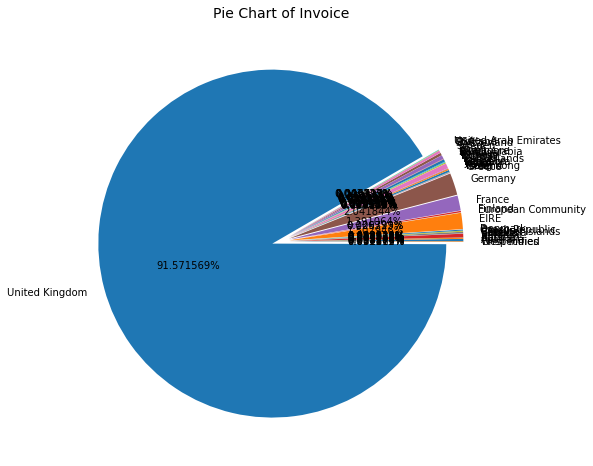

In [46]:
def pie(retail,label,col,title=None, figsize = (32,30), fontsize = 14):
    plt.figure(figsize = figsize)
    labels = retail[label]
    plt.pie(x = retail[col], autopct = '%1f%%', explode = [0.05]*retail[label].count(), labels = labels, pctdistance = 0.5)
    plt.title(title, fontsize = fontsize)
pie(retail = df, label = 'Country', col = 'Invoice', title = 'Pie Chart of Invoice', figsize = (12,8), fontsize = 14)

In [47]:
### 5. Feature creation

In [48]:
retail2['StockValue'] = retail2['Quantity'] * retail2['Price']

C:\Users\admin\AppData\Local\Temp/ipykernel_13808/3627862076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail2['StockValue'] = retail2['Quantity'] * retail2['Price']


In [49]:
last_InvoiceDate = retail2.groupby('Customer ID',as_index=False)['InvoiceDate'].max()
last_InvoiceDate.rename(columns={'InvoiceDate':'last_InvoiceDate'},inplace=True)
last_InvoiceDate.head()

,Customer ID,last_InvoiceDate
0,12346,2011-01-18 10:17:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [50]:

retail2 = retail2.merge(last_InvoiceDate,on='Customer ID')
retail2['Recency'] = ((retail2['last_InvoiceDate']- retail2['InvoiceDate']) / np.timedelta64 (1, 'M')).astype('int64')
retail2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0,StockValue,last_InvoiceDate,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,6.95,83.4,2011-07-05 12:11:00,19
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,6.75,81.0,2011-07-05 12:11:00,19
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,6.75,81.0,2011-07-05 12:11:00,19
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,23,2.10,100.8,2011-07-05 12:11:00,19
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,23,1.25,30.0,2011-07-05 12:11:00,19


In [51]:
np.sort(retail2['Recency'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [52]:
df = retail2.groupby(['Customer ID','Recency']).agg({'Invoice':'nunique','StockValue':'sum'}).reset_index()
df.rename(columns={'Invoice':'Frequency','StockValue':'Monetary'},inplace=True)
df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,0,2,0.00
1,12346,3,2,-5.50
2,12346,6,2,-186.23
3,12346,10,1,27.05
4,12346,11,2,-81.00
